В качестве набора данных мы будем использовать набор данных по ирисам. В этом DataSet рассмотрим длину и ширину чашелистиков и лепестков.

Датасет состоит из следующих значений: 
1) sepal length (cm) - длина чашелистника 
2) sepal width (cm) - ширина чашелистника 
3) petal length (cm) - длина лепестка 
4) petal width (cm) - ширина лепестка 
5) target - целевой признак

ИМПОРТ БИБЛИОТЕК

Импортируем библиотеки с помощью команды import. Загрузим файлы датасета в помощью библиотеки Pandas.

In [25]:
#Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [26]:
df = pd.read_csv('marvel-wikia-data.csv', sep=',')

In [27]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


Количество строк и столбцов хранится в датасете

In [28]:
df.shape

(16376, 13)

Краткая информация обо всех параметрах датасета

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


Поиск и удаление дубликатов

In [30]:
df = df.drop_duplicates()
df.shape

(16376, 13)

<AxesSubplot:xlabel='Year', ylabel='Count'>

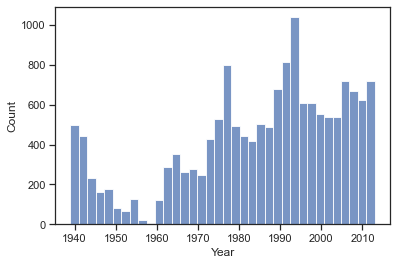

In [31]:
# масштабирование данных
import seaborn as sns

sns.histplot(df['Year'])

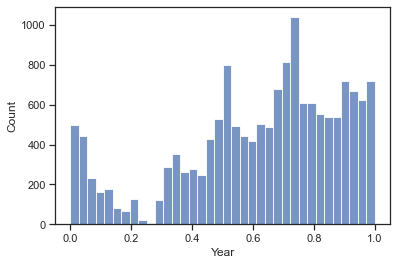

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

df['Year'] = MinMaxScaler().fit_transform(df['Year'].values.reshape(-1, 1))
sns.histplot(df['Year']);

In [33]:
# преобразование категориальных признаков в количественные
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,0.310811
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,0.027027
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,0.472973
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,0.324324
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,0.148649


In [34]:
def find_cat(df):
    for name in df.columns:
        s = ''
        s += name
        if(type(df[name][0]) == str):
            s += ' строка,'
            if(df[name].nunique() <= 3):
                s += ' мало уникальных'
                if(s != name):
                    print (s)

find_cat(df)
df.head

ALIGN строка, мало уникальных
ALIVE строка, мало уникальных


<bound method NDFrame.head of        page_id                                 name  \
0         1678            Spider-Man (Peter Parker)   
1         7139      Captain America (Steven Rogers)   
2        64786  Wolverine (James \"Logan\" Howlett)   
3         1868    Iron Man (Anthony \"Tony\" Stark)   
4         2460                  Thor (Thor Odinson)   
...        ...                                  ...   
16371   657508                   Ru'ach (Earth-616)   
16372   665474      Thane (Thanos' son) (Earth-616)   
16373   695217        Tinkerer (Skrull) (Earth-616)   
16374   708811       TK421 (Spiderling) (Earth-616)   
16375   673702                Yologarch (Earth-616)   

                                       urlslug                ID  \
0                  \/Spider-Man_(Peter_Parker)   Secret Identity   
1            \/Captain_America_(Steven_Rogers)   Public Identity   
2      \/Wolverine_(James_%22Logan%22_Howlett)   Public Identity   
3        \/Iron_Man_(Anthony_%22Tony%

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.page_id)
df['page_id_le'] = le.transform(df.page_id)
df

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,page_id_le
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,0.310811,484
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,0.027027,1516
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,0.472973,5385
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,0.324324,616
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,0.148649,1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN,14496
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,14617
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,15179
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN,15483
